In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv(r'C:\Users\TREESA\Desktop\ML\train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning

In [5]:
train.drop(columns=['Id'], inplace=True)

# Missing values

In [6]:
columns_with_miss = train.isna().sum()
print('Columns with missing values:', len(columns_with_miss))


Columns with missing values: 80


In [7]:
columns_with_miss = columns_with_miss[columns_with_miss!=0]
columns_with_miss.sort_values(ascending=False)



PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [8]:
# Removing columns with large missing values

train.drop(columns=['PoolQC', 'MiscFeature', \
 'Alley', 'Fence'], inplace=True)

# Correlation between FireplaceQu and SalePrice

FireplaceQu has 690 missing values, which is also pretty high. Fireplace has the following categories:

Ex Excellent, Gd Good, TA Average, Fa Fair, Po Poor, NA No Fireplace

In [10]:
train['FireplaceQu'].fillna(0, inplace=True)
train['FireplaceQu'].replace({'Po': 1, 'Fa': 2, \
'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)


Using a barplot, we can see how the category of the FirePlace increases the value of SalePrice.

It is also worth noting how much higher the value is when the house has an Excellent fireplace.

This means we should keep FireplaceQu as feature.

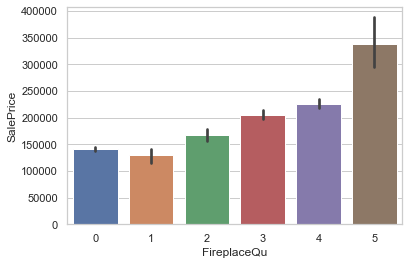

In [11]:
sns.set(style="whitegrid")
sns.barplot(x='FireplaceQu', y="SalePrice", data=train)



# Missing values in numeric columns


In [12]:
#Correlation between the remaining features with missing values and the SalePrice.

columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
c = list(columns_with_miss.index)
c.append('SalePrice')
train[c].corr()



,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
LotFrontage,1.000000,0.193458,0.070250,0.351799
MasVnrArea,0.193458,1.000000,0.252691,0.477493
GarageYrBlt,0.070250,0.252691,1.000000,0.486362
SalePrice,0.351799,0.477493,0.486362,1.000000


LotFrontage, MasVnrArea, and GarageYrBlt have a positive correlation with SalePrice, but this correlation isn't very strong.

To simplify this analisys, we will remove theses columns ,

In [13]:
cols_to_be_removed = ['LotFrontage', 'GarageYrBlt', \
 'MasVnrArea']
train.drop(columns=cols_to_be_removed, inplace=True)

In [14]:
#Final columns with missing values


columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)



Columns with missing values: 11


GarageCond      81
GarageQual      81
GarageFinish    81
GarageType      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
Electrical       1
dtype: int64

# Dealing with missing values in categorical features

In [23]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 73, dtype: int64

# Fill in the missing values with the most common value in the column.


In [24]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
df_most_common_imputed = train.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_most_common_imputed

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [25]:
# Fills NA in place of NaN
for c in ['GarageType', 'GarageFinish', 'BsmtFinType2', \
'BsmtExposure', 'BsmtFinType1']:
    train[c].fillna('NA', inplace=True)
    
# Fills None in place of NaN
train['MasVnrType'].fillna('None', inplace=True)

In [27]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
c = columns_with_miss.sort_values(ascending=False)
print(c)

Columns with missing values: 5
GarageCond    81
GarageQual    81
BsmtCond      37
BsmtQual      37
Electrical     1
dtype: int64


In [42]:
train.head().T

,0,1,2,3,4
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


# One-Hot encoding the categorical parameters

In [46]:
cat_train = train['Neighborhood']

In [47]:
cat_train

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

In [54]:
print(train['Neighborhood'].unique())

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


In [55]:
train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [59]:
one_hot_encoded_data = pd.get_dummies(cat_train).values
print(one_hot_encoded_data)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# PREDICTIVE MODELING

In [60]:
one_hot_encoded_data.shape

(1460, 25)

In [61]:
labels = train['FireplaceQu'].values

In [62]:
print(labels.shape)

(1460,)


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [66]:
x_train , x_test , y_train,y_test = train_test_split(one_hot_encoded_data, labels, test_size = 0.2 ,random_state = 42)

In [67]:
print("Training Shape: ",x_train.shape)
print("Testing Shape: ",x_test.shape)

Training Shape:  (1168, 25)
Testing Shape:  (292, 25)


# TRAINING MODEL

In [68]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
test_score = lr.score(x_test,y_test)
print("Testing Score is: ", test_score)

Testing Score is:  0.25946729798698787


In [70]:
test_score = lr.score(x_train,y_train)
print("Training Score is: ", test_score)

Training Score is:  0.23820137324096924


# DECISION TREE

In [72]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [74]:
test_score = dt.score(x_train,y_train)
print("Testing Score is: ", test_score)

Testing Score is:  0.23938087975843214


In [75]:
test_score = dt.score(x_test,y_test)
print("Testing Score is: ", test_score)

Testing Score is:  0.2651169670060819


# RANDOM FOREST

In [76]:
rnd = RandomForestRegressor()
rnd.fit(x_train,y_train)

RandomForestRegressor()

In [77]:
test_score = rnd.score(x_train,y_train)
print("Testing Score is: ", test_score)

Testing Score is:  0.23911881724746398


In [79]:
test_score = rnd.score(x_test,y_test)
print("Testing Score is: ", test_score)

Testing Score is:  0.26495122196539334


# HYPERPARAMETER TUNING

In [81]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [82]:
 rnd.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [87]:
from sklearn.model_selection import GridSearchCV

lr = LinearRegression()
params={
    'normalize':[True,False],
    'fit_intercept':[False,True]
}
grd_lr_model = GridSearchCV(lr, params)

In [88]:
grd_lr_model.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [False, True],
                         'normalize': [True, False]})

In [89]:
grd_lr_model.best_score_

0.2048674580962798

In [93]:
grd_lr_model.best_params_

{'fit_intercept': True, 'normalize': False}

In [94]:
best_model = grd_lr_model.best_estimator_

In [95]:
best_model

LinearRegression()

In [96]:
best_model.score(x_test,y_test)

0.25946729798698787

# RANDOM FOREST TUNING

In [97]:
rn = RandomForestRegressor()
params = {
    'n_estimators' : [20,40,80,150,200,250,300],
    'max_depth': [5,10,20,25,30],
    'bootstrap' : [False,True],
    'min_samples_split': [2,4,6,8]
    
}
rnd_lr_model = GridSearchCV(rn,params)

In [99]:
rnd_lr_model.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False, True],
                         'max_depth': [5, 10, 20, 25, 30],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [20, 40, 80, 150, 200, 250, 300]})